In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path = r'/cxnfs/Mark/Data/cleaned_data/'
df = pd.read_csv(r'/cxnfs/Mark/Data/complete_data.csv', index_col = 0, parse_dates =  True)
#cleaned data
pm10 = pd.read_csv(path+'pm10_cleaned.csv', index_col = 0, parse_dates = True)
pm25 = pd.read_csv(path+'pm25_cleaned.csv', index_col = 0, parse_dates = True)
pm1 = pd.read_csv(path+'pm1_cleaned.csv', index_col = 0, parse_dates = True)
#storing PM data in a dataframe along with other variables
data = pd.DataFrame()
data.index = df.index
data['pm10'] = pm10.iloc[:,0]
data['pm25'] = pm25.iloc[:,0]
data['pm1'] = pm1.iloc[:,0]
data['windspeed'] = df[' Windspeed (m/s)']
data['wind_dir'] = df[' WindDirect (Degr)']
prepandemic_data = data['2020-02-01':'2020-03-09']
prepandemic_data = prepandemic_data.dropna(how = 'any', axis = 'rows')
# #classes were suspended last March 10, 2020 to March 14, 2020
ecq_data = data['2020-03-17':'2020-05-15'] #start of lockdown until end of ECQ
ecq_data = ecq_data.dropna(how = 'any', axis = 'rows')

## Histogram of PM10 paired with wind speeds < 2.5 m/s and directions < 45$^{\circ}$

Text(0.5, 0, '$PM_{10}~(\\mu g/m^3)$')

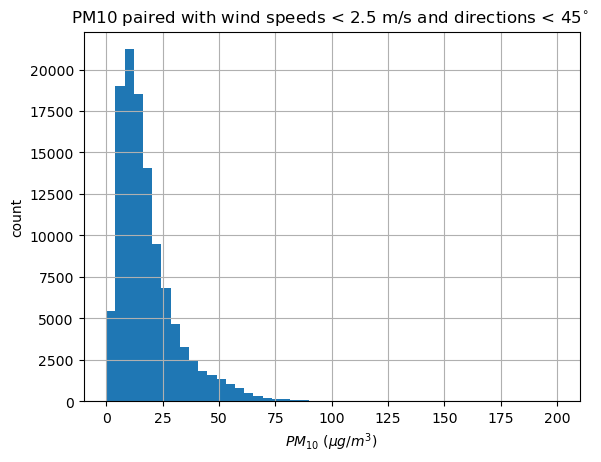

In [17]:
data.pm10[(data.windspeed<2.5) & (data.wind_dir<45)].dropna().hist(bins = np.linspace(0,200))
plt.title("PM10 paired with wind speeds < 2.5 m/s and directions < 45$^{\circ}$ ")
plt.ylabel('count')
plt.xlabel("$PM_{10}~(\mu g/m^3)$")

# Histogram of total $PM_{10}$ data

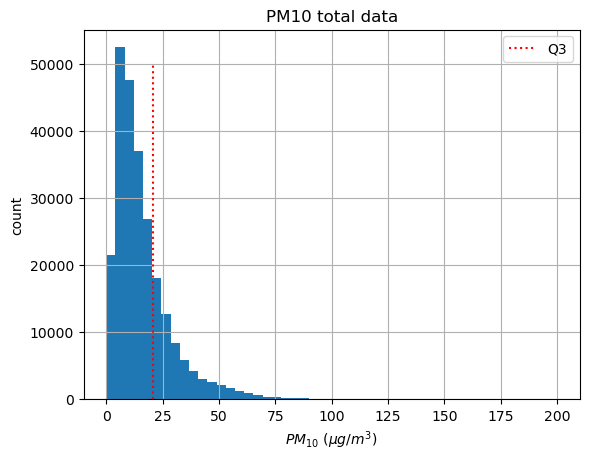

In [22]:
data.pm10.hist(bins = np.linspace(0,200))
plt.title("PM10 total data")
plt.ylabel('count')
plt.xlabel("$PM_{10}~(\mu g/m^3)$")
plt.vlines(20.6, 0, 50000, linestyle = 'dotted', label = 'Q3', color = 'red')
plt.legend()


# Example of normalization plot

In [217]:
example = prepandemic_data['2020-02-01':'2020-02-01'].pm10

Text(0.5, 1.0, '1 Feb 2020 $PM_{10}$ measurements')

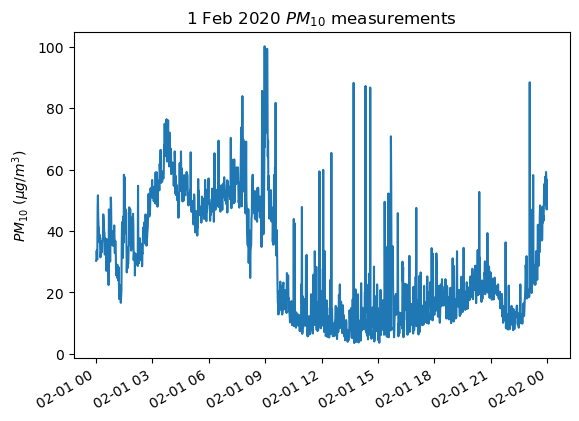

In [219]:
example.plot()
# plt.xticks([])
plt.ylabel("$PM_{10}~(\mu g/m^3)$")
plt.title("1 Feb 2020 $PM_{10}$ measurements")

In [224]:
normalized_example = example.apply(lambda x: (x - example.min())/ (example.max() - example.min()))

Text(0.5, 1.0, '1 Feb 2020 normalized $PM_{10}$ measurements')

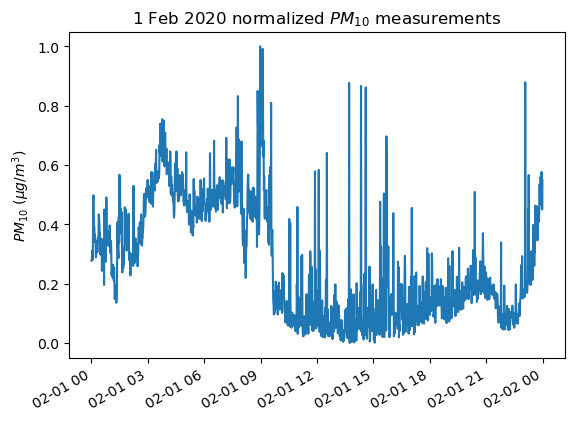

In [226]:
normalized_example.plot()
# plt.xticks([])
plt.ylabel("$PM_{10}~(\mu g/m^3)$")
plt.title("1 Feb 2020 normalized $PM_{10}$ measurements")

# Probability distributions of $PM_{10}$ measurements from 00:00 to 00:59 before and during ECQ.

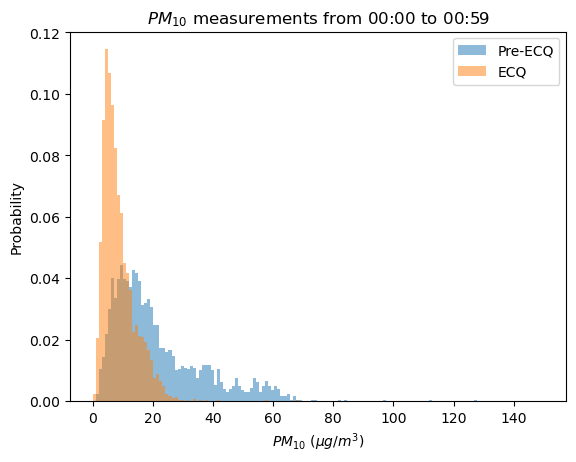

In [26]:
plt.hist(prepandemic_data[['pm10']][(prepandemic_data.index.hour == 0)].iloc[:,0].to_numpy(),
         bins = np.linspace(0,150, 150), density =  True, alpha =0.5, label = 'Pre-ECQ')

plt.title("$PM_{10}$ measurements from 00:00 to 00:59")
plt.xlabel("$PM_{10}~(\mu g/m^3)$")
plt.ylabel('Probability')
# plt.ylim(0, 450)

plt.hist(ecq_data[['pm10']][(ecq_data.index.hour == 0)].iloc[:,0].to_numpy(),
         bins = np.linspace(0,150, 150), density =  True, alpha = 0.5, label = 'ECQ');

plt.legend()
# plt.ylim(0, 450)


# Distributions of $PM_{10}$ measurements from 00:00 to 00:59 viewed as a box plot.

(0.0, 150.0)

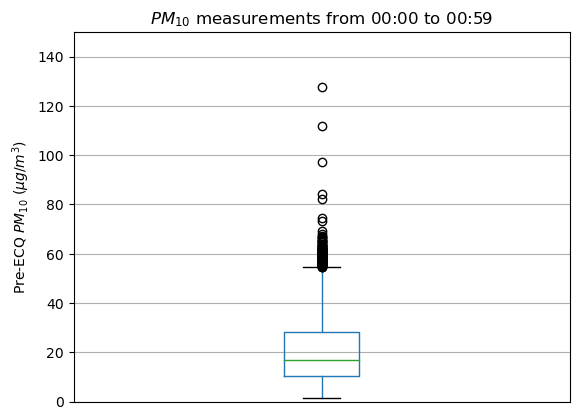

In [184]:
prepandemic_data[['pm10']][(prepandemic_data.index.hour == 0)].boxplot()
plt.title("$PM_{10}$ measurements from 00:00 to 00:59")
plt.ylabel("Pre-ECQ $PM_{10}~(\mu g/m^3)$")
# plt.xlabel([])
plt.xticks([])
# plt.ylabel('count')
plt.ylim(0,150)

# Comparing probability distributions of $PM_{10} Sunday measurements, before and during ECQ.

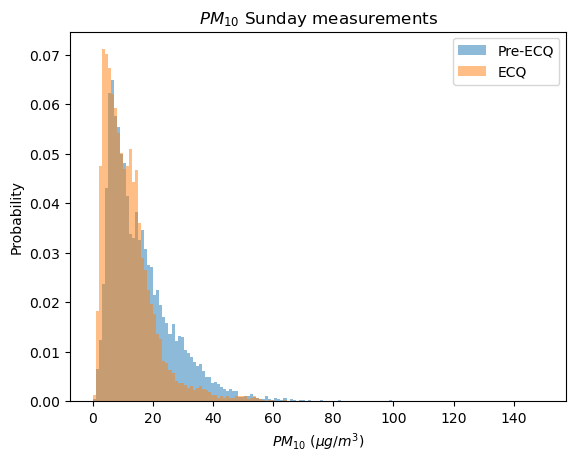

In [27]:
plt.hist(prepandemic_data[['pm10']][(prepandemic_data.index.dayofweek == 0)].iloc[:,0].to_numpy(),
         bins = np.linspace(0,150, 150), density =  True, alpha =0.5, label = 'Pre-ECQ')

plt.title("$PM_{10}$ Sunday measurements")
plt.xlabel("$PM_{10}~(\mu g/m^3)$")
plt.ylabel('Probability')
# plt.ylim(0, 450)

plt.hist(ecq_data[['pm10']][(ecq_data.index.dayofweek == 0)].iloc[:,0].to_numpy(),
         bins = np.linspace(0,150, 150), density =  True, alpha = 0.5, label = 'ECQ');

plt.legend()

# plt.ylim(0, 450)


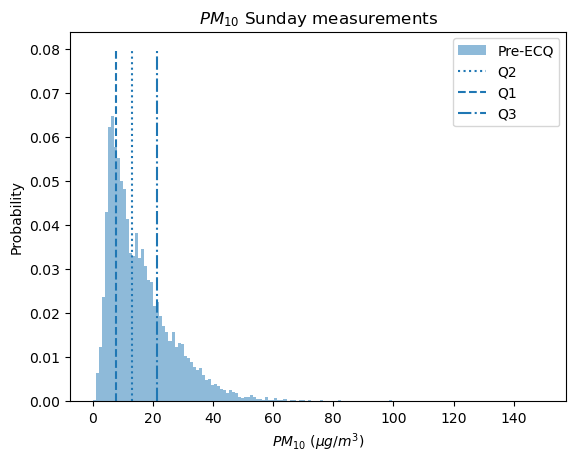

In [48]:
plt.hist(prepandemic_data[['pm10']][(prepandemic_data.index.dayofweek == 0)].iloc[:,0].to_numpy(),
         bins = np.linspace(0,150, 150), density =  True, alpha =0.5, label = 'Pre-ECQ')

plt.title("$PM_{10}$ Sunday measurements")
plt.xlabel("$PM_{10}~(\mu g/m^3)$")
plt.ylabel('Probability')
# plt.ylim(0, 450)

# plt.hist(ecq_data[['pm10']][(ecq_data.index.dayofweek == 0)].iloc[:,0].to_numpy(),
#          bins = np.linspace(0,150, 150), density =  True, alpha = 0.5, label = 'ECQ');
plt.vlines(13, 0, 0.08, linestyle = 'dotted', label = 'Q2')
plt.vlines(7.7, 0, 0.08, linestyle = 'dashed', label = 'Q1')
plt.vlines(21.2, 0, 0.08, linestyle = 'dashdot', label = 'Q3')

plt.legend()

# plt.ylim(0, 450)


# Hourly central tendency and spread comparison

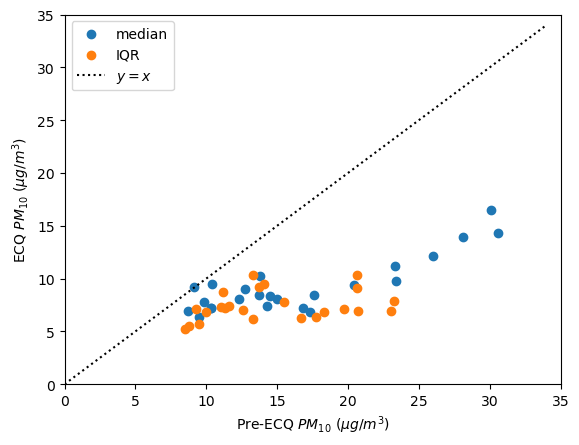

In [91]:
#median comparison
plt.scatter(prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.hour).median().iloc[:,0].to_numpy(),
            ecq_data[['pm10']].groupby(by = ecq_data.index.hour).median().iloc[:,0].to_numpy(), label = 'median')
#IQR
plt.scatter((prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.hour).quantile(0.75) - prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.hour).quantile(0.25)).iloc[:,0].to_numpy(),
           (ecq_data[['pm10']].groupby(by = ecq_data.index.hour).quantile(0.75) - ecq_data[['pm10']].groupby(by = ecq_data.index.hour).quantile(0.25)).iloc[:,0].to_numpy(), label = 'IQR')
plt.plot(np.arange(0,35), np.arange(0,35), color = 'black', label = '$y=x$', linestyle = 'dotted')
plt.xlabel("Pre-ECQ $PM_{10}~(\mu g/m^3)$")
plt.ylabel("ECQ $PM_{10}~(\mu g/m^3)$")
plt.xlim(0,35)
plt.ylim(0,35)
plt.legend()
# plt.title("Pre-ECQ vs ECQ: Comparison of $PM_{10} ~(\mu g/m^3)$")
plt.show()

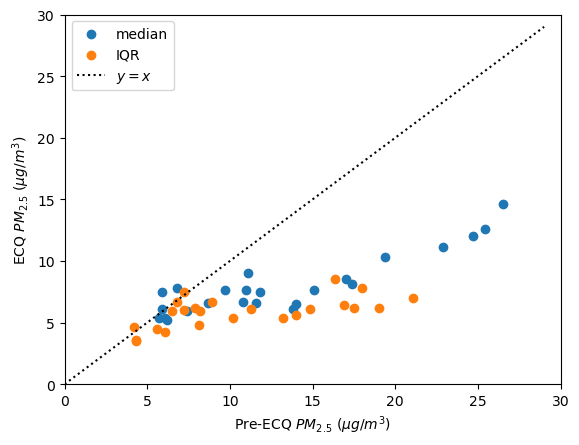

In [94]:
#median comparison
plt.scatter(prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.hour).median().iloc[:,0].to_numpy(),
            ecq_data[['pm25']].groupby(by = ecq_data.index.hour).median().iloc[:,0].to_numpy(), label = 'median')
#IQR
plt.scatter((prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.hour).quantile(0.75) - prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.hour).quantile(0.25)).iloc[:,0].to_numpy(),
           (ecq_data[['pm25']].groupby(by = ecq_data.index.hour).quantile(0.75) - ecq_data[['pm25']].groupby(by = ecq_data.index.hour).quantile(0.25)).iloc[:,0].to_numpy(), label = 'IQR')
plt.plot(np.arange(0,30), np.arange(0,30), color = 'black', label = '$y=x$', linestyle = 'dotted')
plt.xlabel("Pre-ECQ $PM_{2.5}~(\mu g/m^3)$")
plt.ylabel("ECQ $PM_{2.5}~(\mu g/m^3)$")
plt.xlim(0,30)
plt.ylim(0,30)
plt.legend()
# plt.title("Pre-ECQ vs ECQ: Comparison of $PM_{10} ~(\mu g/m^3)$")
plt.show()

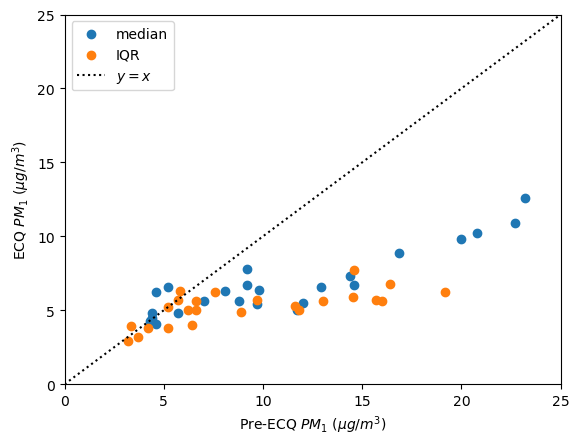

In [96]:
#median comparison
plt.scatter(prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.hour).median().iloc[:,0].to_numpy(),
            ecq_data[['pm1']].groupby(by = ecq_data.index.hour).median().iloc[:,0].to_numpy(), label = 'median')
#IQR
plt.scatter((prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.hour).quantile(0.75) - prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.hour).quantile(0.25)).iloc[:,0].to_numpy(),
           (ecq_data[['pm1']].groupby(by = ecq_data.index.hour).quantile(0.75) - ecq_data[['pm1']].groupby(by = ecq_data.index.hour).quantile(0.25)).iloc[:,0].to_numpy(), label = 'IQR')
plt.plot(np.arange(0,30), np.arange(0,30), color = 'black', label = '$y=x$', linestyle = 'dotted')
plt.xlabel("Pre-ECQ $PM_{1}~(\mu g/m^3)$")
plt.ylabel("ECQ $PM_{1}~(\mu g/m^3)$")
plt.xlim(0,25)
plt.ylim(0,25)
plt.legend()
# plt.title("Pre-ECQ vs ECQ: Comparison of $PM_{10} ~(\mu g/m^3)$")
plt.show()

# Daily central tendency and spread comparison

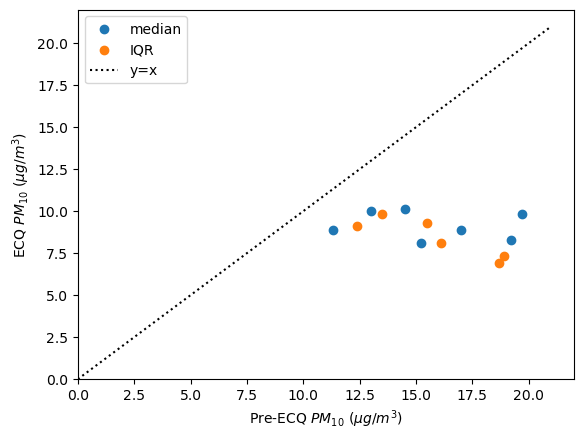

In [5]:
#median
plt.scatter(prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.day_of_week).median(), 
           ecq_data[['pm10']].groupby(by = ecq_data.index.day_of_week).median(), label = 'median')
#iqr
plt.scatter((prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.day_of_week).quantile(0.75) - prepandemic_data[['pm10']].groupby(by = prepandemic_data.index.day_of_week).quantile(0.25)).iloc[:,0].to_numpy(),
           (ecq_data[['pm10']].groupby(by = ecq_data.index.day_of_week).quantile(0.75) - ecq_data[['pm10']].groupby(by = ecq_data.index.day_of_week).quantile(0.25)).iloc[:,0].to_numpy(), label  = 'IQR')           
#y=x
plt.plot(np.arange(0,22), np.arange(0,22), label = 'y=x', linestyle = 'dotted', color = 'black')
plt.xlabel("Pre-ECQ $PM_{10}~(\mu g/m^3)$")
plt.ylabel("ECQ $PM_{10}~(\mu g/m^3)$")
plt.xlim(0,22)
plt.ylim(0,22)
plt.legend()
plt.show()

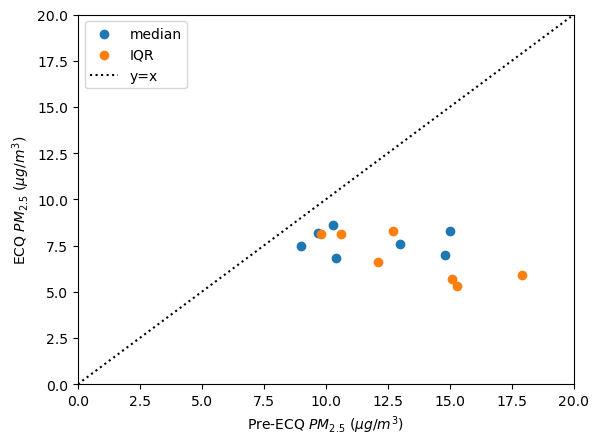

In [7]:
#median
plt.scatter(prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.day_of_week).median(), 
           ecq_data[['pm25']].groupby(by = ecq_data.index.day_of_week).median(), label = 'median')
#iqr
plt.scatter((prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.day_of_week).quantile(0.75) - prepandemic_data[['pm25']].groupby(by = prepandemic_data.index.day_of_week).quantile(0.25)).iloc[:,0].to_numpy(),
           (ecq_data[['pm25']].groupby(by = ecq_data.index.day_of_week).quantile(0.75) - ecq_data[['pm25']].groupby(by = ecq_data.index.day_of_week).quantile(0.25)).iloc[:,0].to_numpy(), label  = 'IQR')           
#y=x
plt.plot(np.arange(0,22), np.arange(0,22), label = 'y=x', linestyle = 'dotted', color = 'black')
plt.xlabel("Pre-ECQ $PM_{2.5}~(\mu g/m^3)$")
plt.ylabel("ECQ $PM_{2.5}~(\mu g/m^3)$")
plt.xlim(0,20)
plt.ylim(0,20)
plt.legend()
plt.show()


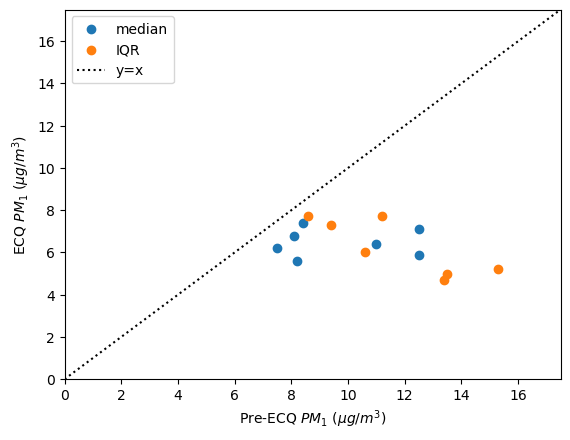

In [8]:
#median
plt.scatter(prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.day_of_week).median(), 
           ecq_data[['pm1']].groupby(by = ecq_data.index.day_of_week).median(), label = 'median')
#iqr
plt.scatter((prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.day_of_week).quantile(0.75) - prepandemic_data[['pm1']].groupby(by = prepandemic_data.index.day_of_week).quantile(0.25)).iloc[:,0].to_numpy(),
           (ecq_data[['pm1']].groupby(by = ecq_data.index.day_of_week).quantile(0.75) - ecq_data[['pm1']].groupby(by = ecq_data.index.day_of_week).quantile(0.25)).iloc[:,0].to_numpy(), label  = 'IQR')           
#y=x
plt.plot(np.arange(0,22), np.arange(0,22), label = 'y=x', linestyle = 'dotted', color = 'black')
plt.xlabel("Pre-ECQ $PM_{1}~(\mu g/m^3)$")
plt.ylabel("ECQ $PM_{1}~(\mu g/m^3)$")
plt.xlim(0,17.5)
plt.ylim(0,17.5)
plt.legend()
plt.show()